In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\ApartmentRentPrediction_Milestone2.csv")

In [3]:
data.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,RentCategory,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5508832632,housing/rent/apartment,"Two BR - $1,194/mo - Apartment - come and see ...","Come experience. in Cary, NC offering recently...","Clubhouse,Fireplace,Gym,Patio/Deck,Playground,...",2.5,2.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,800,NaN,Cary,NC,35.7585,-78.7783,RentDigs.com,1568755960
1,5664576849,housing/rent/apartment,One BR 640 West Wilson Street,This unit is located at 640 West Wilson Street...,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,795,640 West Wilson St,Madison,WI,43.0724,-89.4003,RentLingo,1577015508
2,5668619365,housing/rent/apartment,One BR 2777 Sw Archer Rd,"This unit is located at 2777 Sw Archer Rd, Gai...","Basketball,Cable or Satellite,Dishwasher,Inter...",1.0,1.0,USD,No,Thumbnail,...,Medium-Priced Rent,Monthly,560,2777 SW Archer Road,Gainesville,FL,29.6533,-82.3656,RentLingo,1577358921
3,5668632604,housing/rent/apartment,One BR 534-542 Park Avenue,"This unit is located at 534-542 Park Avenue, O...",NaN,1.0,1.0,USD,No,Thumbnail,...,Low Rent,Monthly,600,534-542 Park Ave,Omaha,NE,41.2562,-96.0404,RentLingo,1577359849
4,5668637441,housing/rent/apartment,Three BR 2216 S Palm Grove Ave,"This unit is located at 2216 S Palm Grove Ave,...",NaN,3.0,3.0,USD,No,Thumbnail,...,High Rent,Monthly,1600,2216 S Palm Grove Avenue,Los Angeles,CA,34.0372,-118.2972,RentLingo,1577360159


In [4]:
X = data.drop(columns=['RentCategory'])
y = data['RentCategory']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [6]:
X_train['bedrooms']

6317    3.0
740     3.0
3781    2.0
7850    3.0
2963    0.0
       ... 
5734    3.0
5191    1.0
5390    2.0
860     1.0
7270    1.0
Name: bedrooms, Length: 7200, dtype: float64

In [7]:
numeric_columns = X.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Replace outliers with lower and upper bounds for each numeric feature in the training set
for column in X_train_numeric.columns:
    q1_train = X_train_numeric[column].quantile(0.25)
    q3_train = X_train_numeric[column].quantile(0.75)
    iqr_train = q3_train - q1_train
    lower_bound_train = q1_train - 1.5 * iqr_train
    upper_bound_train = q3_train + 1.5 * iqr_train
    X_train_numeric[column] = X_train_numeric[column].apply(lambda x: lower_bound_train if x < lower_bound_train else (upper_bound_train if x > upper_bound_train else x))

# Replace outliers with lower and upper bounds for each numeric feature in the test set (using the bounds from the training set)
for column in X_test_numeric.columns:
    q1_train = X_train_numeric[column].quantile(0.25)
    q3_train = X_train_numeric[column].quantile(0.75)
    iqr_train = q3_train - q1_train
    lower_bound_train = q1_train - 1.5 * iqr_train
    upper_bound_train = q3_train + 1.5 * iqr_train
    X_test_numeric[column] = X_test_numeric[column].apply(lambda x: lower_bound_train if x < lower_bound_train else (upper_bound_train if x > upper_bound_train else x))

# Update X_train and X_test with the processed numeric features
X_train.update(X_train_numeric)
X_test.update(X_test_numeric)


C:\Users\HP\AppData\Local\Temp\ipykernel_11460\962592021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric[column] = X_train_numeric[column].apply(lambda x: lower_bound_train if x < lower_bound_train else (upper_bound_train if x > upper_bound_train else x))
C:\Users\HP\AppData\Local\Temp\ipykernel_11460\962592021.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numeric[column] = X_train_numeric[column].apply(lambda x: lower_bound_train if x < lower_bound_train else (upper_boun

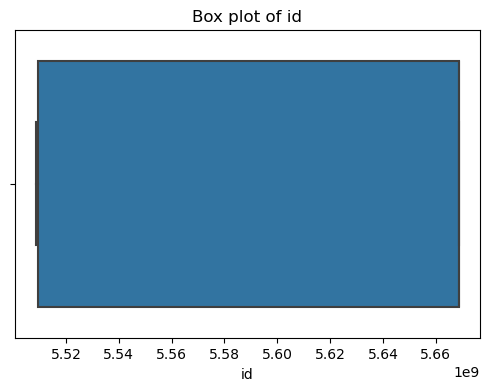

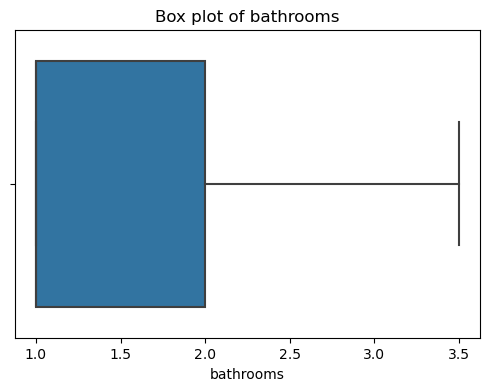

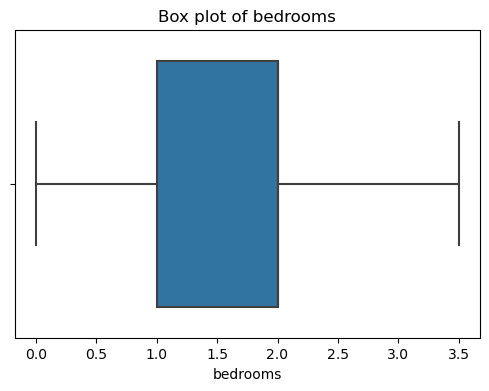

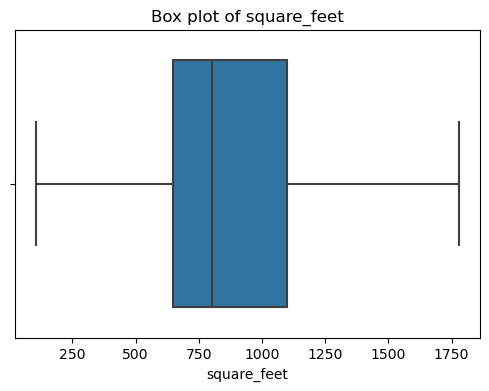

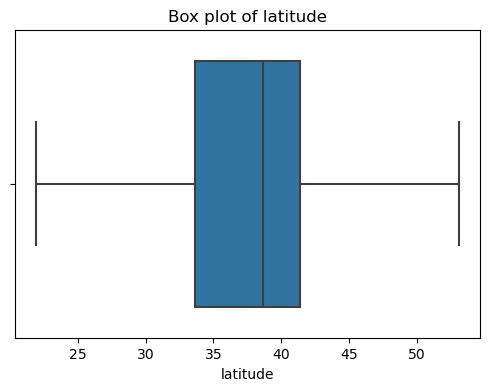

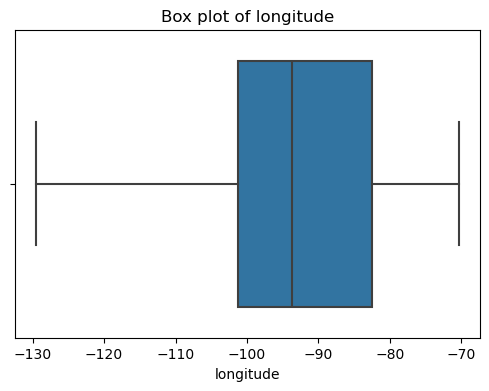

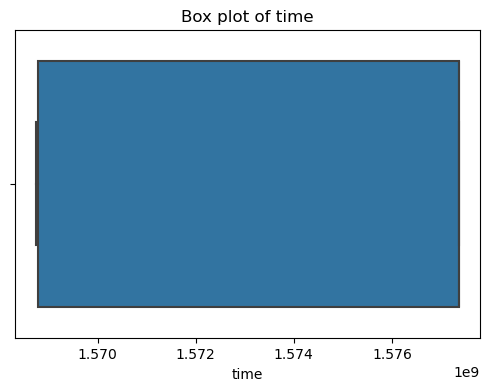

In [8]:
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X_train[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

In [9]:
data.isnull().sum()

id                 0
category           0
title              0
body               0
amenities       3185
bathrooms         30
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    3751
RentCategory       0
price_type         0
square_feet        0
address         2971
cityname          66
state             66
latitude           7
longitude          7
source             0
time               0
dtype: int64

In [10]:
selected_columns = ['amenities', 'bathrooms', 'bedrooms','pets_allowed','address','cityname','state','longitude','latitude']

# Loop through each column and fill missing values with the most frequent value
for col in selected_columns:
    most_frequent_value = X_train[col].mode()[0]  # Calculate the most frequent value
    X_train[col].fillna(most_frequent_value, inplace=True)
    X_test[col].fillna(most_frequent_value, inplace=True)

In [11]:
X_test.isnull().sum()

id              0
category        0
title           0
body            0
amenities       0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price_type      0
square_feet     0
address         0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
dtype: int64

In [12]:
columns_to_check = ['bathrooms','bedrooms']
for col in columns_to_check:
    # Convert floating-point numbers to integers, effectively removing the decimal part
    X_train[col] = X_train[col].apply(lambda x: int(x) if pd.notnull(x) else None)
    X_train[col].astype(int)
    X_test[col] = X_test[col].apply(lambda x: int(x) if pd.notnull(x) else None)
    X_test[col].astype(int)

## numerical_columns

In [13]:
numerical_columns = X_train.select_dtypes(include=['int', 'float'])

# Creating a new dataframe with only numerical columns
X_train_numeric =pd.concat([numerical_columns, y_train], axis=1)

print(X_train_numeric)

              id  bathrooms  bedrooms  square_feet  latitude  longitude  \
6317  5668624413          2         3         1459   27.7164   -82.4294   
740   5664573224          2         3         1581   33.9217   -84.8634   
3781  5508812979          2         2         1123   36.1536  -115.1965   
7850  5664596563          2         3         1778   34.4312  -119.7292   
2963  5668639298          1         0          350   45.5091  -122.6449   
...          ...        ...       ...          ...       ...        ...   
5734  5668626499          1         3         1700   47.6160  -122.3275   
5191  5664570303          1         1          715   29.8831   -97.9450   
5390  5509091562          1         2          803   32.7583   -97.0880   
860   5664579706          1         1          758   43.0619   -88.4017   
7270  5668624902          1         1          825   39.8163   -98.5576   

            time        RentCategory  
6317  1577359238  Medium-Priced Rent  
740   1577015200  Med

In [14]:
label_encoder = LabelEncoder()
X_train_numeric['RentCategory'] = label_encoder.fit_transform(X_train_numeric['RentCategory'])

In [15]:
significant_features = []
for column in X_train_numeric:
    # Group data by target variable and extract values for each group
    groups = [X_train_numeric[X_train_numeric['RentCategory'] == value][column] for value in X_train_numeric['RentCategory'].unique()]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*groups)
    # Check if p-value is significant (below 0.05)
    if p_value !=9.901637489567058e-30 and p_value !=1.96884639217238e-29 :
        significant_features.append(column)
    # Print ANOVA results
    print(f'ANOVA for {column}: F-statistic={f_statistic}, p-value={p_value}')

# Filter dataframe to keep only significant features
data_train_filtered_numeric = X_train_numeric[significant_features]

# Print dataframe with significant features
print("Dataframe with significant features:")
print(data_train_filtered_numeric)

ANOVA for id: F-statistic=66.70829589551701, p-value=1.96884639217238e-29
ANOVA for bathrooms: F-statistic=616.2365652881705, p-value=9.264728474364887e-248
ANOVA for bedrooms: F-statistic=329.7794849064483, p-value=9.246608716329216e-138
ANOVA for square_feet: F-statistic=745.5466132832332, p-value=5.495009310112134e-295
ANOVA for latitude: F-statistic=10.26157495278637, p-value=3.546473898583434e-05
ANOVA for longitude: F-statistic=124.30734712955488, p-value=8.424117930300552e-54
ANOVA for time: F-statistic=67.40843712978676, p-value=9.901637489567058e-30
ANOVA for RentCategory: F-statistic=inf, p-value=0.0
Dataframe with significant features:
      bathrooms  bedrooms  square_feet  latitude  longitude  RentCategory
6317          2         3         1459   27.7164   -82.4294             2
740           2         3         1581   33.9217   -84.8634             2
3781          2         2         1123   36.1536  -115.1965             2
7850          2         3         1778   34.4312 

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [16]:
data_train_filtered_numeric.drop(columns='RentCategory',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11460\2090663575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_filtered_numeric.drop(columns='RentCategory',inplace=True)


## object_columns

In [17]:
object_columns = X_train.select_dtypes(include=['object'])

# Creating a new dataframe with only numerical columns
X_train_object_data =pd.concat([object_columns,y_train], axis=1)

print(X_train_object_data)

                    category  \
6317  housing/rent/apartment   
740   housing/rent/apartment   
3781  housing/rent/apartment   
7850  housing/rent/apartment   
2963  housing/rent/apartment   
...                      ...   
5734  housing/rent/apartment   
5191  housing/rent/apartment   
5390  housing/rent/apartment   
860   housing/rent/apartment   
7270  housing/rent/apartment   

                                                  title  \
6317                   Three BR 2314 Pleasure Run Drive   
740                            Three BR 121 Omega Court   
3781                          Attractive Two BR, Two BA   
7850                                 Three BR 209 BA St   
2963                 Studio apartment 1385 NW 22nd Ave.   
...                                                 ...   
5734         Three BR 7305 16th Avenue Northwest Unit B   
5191                            One BR 1001 Leah Avenue   
5390  One BA $1,025/mo Arlington - must see to belie...   
860                      

In [18]:
significant_features = []

# Perform chi-square test for each categorical variable
for col in X_train_object_data:
    contingency_table = pd.crosstab(X_train_object_data[col], X_train_object_data['RentCategory'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value < 0.000000000000001:
        significant_features.append(col)

# Drop non-significant features from the DataFrame
object_filtered = X_train_object_data.drop(columns=[col for col in X_train_object_data.columns if col not in significant_features])

print("DataFrame with significant features:")
print(object_filtered)

DataFrame with significant features:
           cityname state        source        RentCategory
6317         Ruskin    FL     RentLingo  Medium-Priced Rent
740          Dallas    GA     RentLingo  Medium-Priced Rent
3781      Las Vegas    NV  RentDigs.com  Medium-Priced Rent
7850  Santa Barbara    CA     RentLingo           High Rent
2963       Portland    OR     RentLingo  Medium-Priced Rent
...             ...   ...           ...                 ...
5734        Seattle    WA     RentLingo           High Rent
5191     San Marcos    TX     RentLingo            Low Rent
5390      Arlington    TX  RentDigs.com  Medium-Priced Rent
860       Delafield    WI     RentLingo  Medium-Priced Rent
7270         Austin    TX     RentLingo           High Rent

[7200 rows x 4 columns]


In [19]:
object_filtered.drop(columns='RentCategory',inplace=True)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a dictionary to store OrdinalEncoder instances
ordinal_encoders = {}

for col in object_filtered:
    ordinal_encoders[col] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    # Fit and transform the training data
    object_filtered[col] = ordinal_encoders[col].fit_transform(X_train[[col]])
    # Transform the testing data
    X_test[col] = ordinal_encoders[col].transform(X_test[[col]])
for col, encoder in ordinal_encoders.items():
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)    

In [21]:
x_train_filter = pd.concat([data_train_filtered_numeric, object_filtered ], axis=1)

In [22]:
x_train_filter

,bathrooms,bedrooms,square_feet,latitude,longitude,cityname,state,source
6317,2,3,1459,27.7164,-82.4294,1056.0,9.0,8.0
740,2,3,1581,33.9217,-84.8634,303.0,10.0,8.0
3781,2,2,1123,36.1536,-115.1965,633.0,32.0,7.0
7850,2,3,1778,34.4312,-119.7292,1094.0,4.0,8.0
2963,1,0,350,45.5091,-122.6449,979.0,36.0,8.0
...,...,...,...,...,...,...,...,...
5734,1,3,1700,47.6160,-122.3275,1114.0,46.0,8.0
5191,1,1,715,29.8831,-97.9450,1085.0,42.0,8.0
5390,1,2,803,32.7583,-97.0880,41.0,42.0,7.0
860,1,1,758,43.0619,-88.4017,313.0,47.0,8.0


In [23]:
X_test

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
7940,5509201929,housing/rent/apartment,Pet Friendly 2+2 Apartment in Odenton. Single ...,"Square footage: 1058 square feet, unit number:...","AC,Cable or Satellite,Clubhouse,Dishwasher,Ele...",2,2,USD,No,Yes,"Cats,Dogs",Monthly,1058,500 Sleepy Hollow Rd,893.0,20.0,39.0747,-76.7017,7.0,1568779086
1162,5668627277,housing/rent/apartment,Two BR 6343 N Wayne Ave,"This unit is located at 6343 N Wayne Ave, Chic...","Dishwasher,Refrigerator",1,2,USD,No,Thumbnail,"Cats,Dogs",Monthly,1400,6343 N Wayne Avenue,234.0,14.0,41.8625,-87.6825,8.0,1577359446
582,5508866806,housing/rent/apartment,"Bright Denver, One BR, One BA for rent. Offstr...","Square footage: 630 sq. feet, unit number: 05....","Fireplace,Parking,Patio/Deck,Storage,Washer Dryer",1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,630,500 Sleepy Hollow Rd,316.0,5.0,39.6767,-104.8854,7.0,1568758210
4081,5651549929,housing/rent/apartment,10891 Edgemere Blvd J8,SPACIOUS 2 BEDROOMs APARTMENT WITH WASHER+DRYE...,"Cable or Satellite,Dishwasher,Garbage Disposal...",1,2,USD,No,Thumbnail,"Cats,Dogs",Monthly,840,10891 Edgemere Boulevard J8,359.0,42.0,31.7951,-106.3886,2.0,1576189632
8412,5668634408,housing/rent/apartment,Two BR 15919 172nd Street SE,"This unit is located at 15919 172nd Street SE,...","Dishwasher,Refrigerator",1,2,USD,No,Thumbnail,Cats,Monthly,600,15919 172nd St SE,-1.0,46.0,47.8920,-122.0581,8.0,1577359982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,5668639430,housing/rent/apartment,Studio apartment 3820 Harney Street,"This unit is located at 3820 Harney Street, Om...","Dishwasher,Refrigerator",1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,566,3820 Harney St,898.0,28.0,41.2562,-96.0404,8.0,1577360313
6925,5508755598,housing/rent/apartment,"One BR, $1,500/mo, Cleveland - come and see th...","Square footage: 790 sq. feet, unit number: 205...","Parking,Storage",1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,790,500 Sleepy Hollow Rd,252.0,34.0,41.5073,-81.6046,7.0,1568750164
6521,5668633019,housing/rent/apartment,One BR Boulder Creek I 7601 West Boulder Creek...,This unit is located at Boulder Creek I 7601 W...,"Dishwasher,Refrigerator",1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,739,Boulder Creek I 7601 West Boulder Creek Place,1136.0,40.0,43.5329,-96.7265,8.0,1577359883
3002,5668624090,housing/rent/apartment,One BR 277-279 Columbus Avenue,This unit is located at 277-279 Columbus Avenu...,Refrigerator,1,1,USD,No,Thumbnail,"Cats,Dogs",Monthly,560,277-279 Columbus Ave,1082.0,4.0,37.7599,-122.4379,8.0,1577359214


In [24]:
common_columns = X_test.columns.intersection(x_train_filter.columns)
for col in X_test:
  if col not in common_columns  :
     X_test.drop(columns=col,inplace=True)




In [25]:
X_test

,bathrooms,bedrooms,square_feet,cityname,state,latitude,longitude,source
7940,2,2,1058,893.0,20.0,39.0747,-76.7017,7.0
1162,1,2,1400,234.0,14.0,41.8625,-87.6825,8.0
582,1,1,630,316.0,5.0,39.6767,-104.8854,7.0
4081,1,2,840,359.0,42.0,31.7951,-106.3886,2.0
8412,1,2,600,-1.0,46.0,47.8920,-122.0581,8.0
...,...,...,...,...,...,...,...,...
3063,1,1,566,898.0,28.0,41.2562,-96.0404,8.0
6925,1,1,790,252.0,34.0,41.5073,-81.6046,7.0
6521,1,1,739,1136.0,40.0,43.5329,-96.7265,8.0
3002,1,1,560,1082.0,4.0,37.7599,-122.4379,8.0


In [26]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [27]:
x_train_filter

,bathrooms,bedrooms,square_feet,latitude,longitude,cityname,state,source
6317,2,3,1459,27.7164,-82.4294,1056.0,9.0,8.0
740,2,3,1581,33.9217,-84.8634,303.0,10.0,8.0
3781,2,2,1123,36.1536,-115.1965,633.0,32.0,7.0
7850,2,3,1778,34.4312,-119.7292,1094.0,4.0,8.0
2963,1,0,350,45.5091,-122.6449,979.0,36.0,8.0
...,...,...,...,...,...,...,...,...
5734,1,3,1700,47.6160,-122.3275,1114.0,46.0,8.0
5191,1,1,715,29.8831,-97.9450,1085.0,42.0,8.0
5390,1,2,803,32.7583,-97.0880,41.0,42.0,7.0
860,1,1,758,43.0619,-88.4017,313.0,47.0,8.0


In [28]:
X_test

,bathrooms,bedrooms,square_feet,cityname,state,latitude,longitude,source
7940,2,2,1058,893.0,20.0,39.0747,-76.7017,7.0
1162,1,2,1400,234.0,14.0,41.8625,-87.6825,8.0
582,1,1,630,316.0,5.0,39.6767,-104.8854,7.0
4081,1,2,840,359.0,42.0,31.7951,-106.3886,2.0
8412,1,2,600,-1.0,46.0,47.8920,-122.0581,8.0
...,...,...,...,...,...,...,...,...
3063,1,1,566,898.0,28.0,41.2562,-96.0404,8.0
6925,1,1,790,252.0,34.0,41.5073,-81.6046,7.0
6521,1,1,739,1136.0,40.0,43.5329,-96.7265,8.0
3002,1,1,560,1082.0,4.0,37.7599,-122.4379,8.0


In [29]:
##order of columns must be same in test set and train set
X_train_filter = pd.DataFrame(x_train_filter, columns=x_train_filter.columns)
X_test = pd.DataFrame(X_test, columns=x_train_filter.columns)

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_filter)
X_test_scaled = scaler.transform(X_test)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [31]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']

}

# Create an SVM model
svm_model = SVC()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Train the model using GridSearch
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions on the training set
y_train_pred = best_svm.predict(X_train_scaled)

# Calculate accuracy score on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing set
y_test_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy score on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)


Training Accuracy: 0.7680555555555556
Testing Accuracy: 0.7288888888888889
Best parameters: {'C': 10, 'kernel': 'rbf'}


In [32]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 4,6,7,8,9],

    'metric': ['euclidean', 'manhattan','minkowski']
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Instantiate the GridSearchCV object
#cv is the number of folds
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5)

# Train the model using GridSearch
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_

# Make predictions on the training set
y_train_pred_knn = best_knn.predict(X_train_scaled)

# Calculate accuracy score on the training set
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print("Training Accuracy (KNN):", train_accuracy_knn)

# Make predictions on the testing set
y_test_pred_knn = best_knn.predict(X_test_scaled)

# Calculate accuracy score on the testing set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("Testing Accuracy (KNN):", test_accuracy_knn)

# Print the best parameters found
print("Best parameters (KNN):", grid_search_knn.best_params_)
with open('best_knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)


Training Accuracy (KNN): 0.7911111111111111
Testing Accuracy (KNN): 0.7355555555555555
Best parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 7}


In [33]:
from xgboost import XGBClassifier
param_grid_xgb = {
    'max_depth':[9,10,11],
    'reg_alpha': [11,12,13],
    'reg_lambda': [12,13,14]
}

# Create an XGBoost model
xgb_model = XGBClassifier()

# Instantiate the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)

# Train the model using GridSearch for XGBoost
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best XGBoost model
best_xgb = grid_search_xgb.best_estimator_

# Make predictions on the training set using the best XGBoost model
y_train_pred_xgb = best_xgb.predict(X_train_scaled)

# Calculate accuracy score on the training set for XGBoost
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print("Training Accuracy (XGBoost):", train_accuracy_xgb)

# Make predictions on the testing set using the best XGBoost model
y_test_pred_xgb = best_xgb.predict(X_test_scaled)

# Calculate accuracy score on the testing set for XGBoost
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("Testing Accuracy (XGBoost):", test_accuracy_xgb)

# Print the best parameters found for XGBoost
print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)


Training Accuracy (XGBoost): 0.8315277777777778
Testing Accuracy (XGBoost): 0.7811111111111111
Best parameters (XGBoost): {'max_depth': 9, 'reg_alpha': 11, 'reg_lambda': 12}
